<a href="https://colab.research.google.com/github/Juliaan20/Juliaan20/blob/main/ML_corhuila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Librerias

import numpy as np
import pandas as pd
import math as mat

#visualizacion de datos

import matplotlib.pyplot as plt
import seaborn as sns
import os

#no presentar advertencias
import warnings
warnings.filterwarnings("ignore")

##Librerías para test de normalidad
import statsmodels.api as sm
from scipy import stats

# Función para importar data .xlsx o .csv
def importDatos(ruta, archivo, ext):
    if ext == '.csv':
        data = pd.read_csv(ruta+archivo+ext)
        return data
    elif ext == '.xlsx':
        data = pd.read_excel(ruta+archivo+ext)
        return data
    else:
        print('Extensión diferente')

In [ ]:
# Función para el test de Shapiro - wilk - resistente al ruido en los datos
def testShapiroWilk(df):
    valoresP = []
    concepto = []
    variable = []
    for column in df:
        k2, p_value = stats.shapiro(df[column].values)
        valoresP.append(p_value)
        variable.append(column)
        if (p_value < 0.05):
            concepto.append('No es una variable Normal')
        else:
            concepto.append('Es una variable Normal')
    dfShapiro = pd.DataFrame(
        {'Variable': variable, 'Valores P': valoresP, 'Concepto': concepto})
    return dfShapiro


def multigrafDos(df, coluno, coldos, coltres):
  h = sns.FacetGrid(df, col=coluno, height=4, aspect=.5)
  h.map(sns.barplot, coldos, coltres, order=['M','F'])
  return h

def barrasM(df, colx, coly, cruce):
  sns.catplot(x=colx, y=coly, hue=cruce, kind='bar', data=df)

def disper(df, cruce, num, numdos):
  g = sns.FacetGrid(df, hue=cruce, palette='flare', height=5)
  g.map(sns.scatterplot, num,numdos, s=100, alpha=.5)
  g.add_legend()
  return g

def multigrafT(df, var1, var2, var3, var4, var5):
  sns.pairplot(df, x_vars=[var1, var2, var3, var4], y_vars=var5, height=6, aspect=1, kind='scatter')

def corr(df):
  f, ax = plt.subplots(figsize=(18,10))
  sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)


In [ ]:
def tidy_corr_matrix(corr_mat):
    
    #Función para convertir una matriz de correlación de pandas en formato tidy.
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

# Funcion para revisar datos categóricos o texto
def revCategoricos(df, nomCol):
    rev = df[nomCol].value_counts()
    return rev

In [ ]:
##Normalización
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

##Función para el modelo 
import statsmodels.api as s

# Función para datos categóricos modificaciones
def imputacionCat(df, nomCol, busqueda, reempl):
    df[nomCol] = np.where(df[nomCol] == busqueda, reempl, df[nomCol])
    return df[nomCol]

# Función cambiar encabezados del dataframe
def camEncab(df, listaN):
    df.columns = listaN
    return df

##Función para cruce de variables
def grafT(df, vect, vary):
    sns.pairplot(df, x_vars=vect, y_vars=vary, height=4, aspect=1, kind='reg')

#definir datos NA
def datos_NA(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimensiones : %d filas, %d columnas" %
              (df.shape[0], df.shape[1]))
        print("Total Valores NA : %d " % (total_na))
        print("%38s %10s     %10s %10s" %
              ("Nombre Columna", "Tipo de Dato", "#Distintos", "Valores NA"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%38s %10s   %10s %10s" %
                  (col_name[i], dtyp[i], uniq[i], na_val[i]))
##Función para cruce de variables
def grafT(df, vect, vary):
    sns.pairplot(df, x_vars=vect, y_vars=vary, height=4, aspect=1, kind='reg')

1. Realizar la limpieza de datos NAN y datos inconsistentes tanto numéricos como categóricos.

In [ ]:
datos = pd.read_csv('/content/BONO.csv')
datos.head()

,IDMATRICULA,GENERO,FECHA_NAC,EDAD,PROGRAMA,VALORMATRICULA,BONO,FAMILIAR_EGRESADO
0,12569874,Femenino,2/12/1985,35,Ingeniería de Sistemas,2300000,SIN DESCUENTO,SI
1,12569876,Masculino,4/23/1998,23,Ingeniería Industrial,2600000,DESCUENTO,NO
2,12569878,Femenino,5/13/1999,12,Ingeniería Renovables,3200000,SIN DESCUENTO,NO
3,12569880,Masculino,2/12/1985,30,Ingeniería Mecatrónica,3500000,DESCUENTO,NO
4,12569882,Femenino,4/23/1998,18,Ingeniería de Sistemas,2300000,SIN DESCUENTO,SI


In [ ]:
datos.describe

<bound method NDFrame.describe of     IDMATRICULA         GENERO  FECHA_NAC  EDAD                PROGRAMA  \
0      12569874       Femenino  2/12/1985    35  Ingeniería de Sistemas   
1      12569876      Masculino  4/23/1998    23   Ingeniería Industrial   
2      12569878       Femenino  5/13/1999    12   Ingeniería Renovables   
3      12569880      Masculino  2/12/1985    30  Ingeniería Mecatrónica   
4      12569882       Femenino  4/23/1998    18  Ingeniería de Sistemas   
5      12569884      Masculino  5/13/1999    16   Ingeniería Industrial   
6      12569886      Femenino…  2/12/1985    13   Ingeniería Renovables   
7      12569888      Masculino  4/23/1998    11  Ingeniería Mecatrónica   
8      12569890       Femenino  5/13/1999     8  Ingeniería de Sistemas   
9      12569892      Masculino  2/12/1985     6   Ingeniería Industrial   
10     12569894       Femenino  4/23/1998     3   Ingeniería Renovables   
11     12569896      Masculino  5/13/1999     0  Ingeniería Mecatr

In [ ]:
#importarlo al drive back up
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#como podemos observar no hay datos vacios
datos_NA(datos)

Dimensiones : 49 filas, 8 columnas
Total Valores NA : 0 
                        Nombre Columna Tipo de Dato     #Distintos Valores NA
                           IDMATRICULA      int64           49          0
                                GENERO     object            4          0
                             FECHA_NAC     object            9          0
                                  EDAD      int64           23          0
                              PROGRAMA     object            4          0
                        VALORMATRICULA      int64            4          0
                                  BONO     object            2          0
                     FAMILIAR_EGRESADO     object            2          0


In [ ]:
#Revision de variables categoricas
cat = [var for var in datos.columns  if datos[var].dtype=='O']
print('Las Variables categoricas son:\n\n', cat)

Las Variables categoricas son:

 ['GENERO', 'FECHA_NAC', 'PROGRAMA', 'BONO', 'FAMILIAR_EGRESADO']


In [ ]:
### Revision de variables numericas
num = [var for var in datos.columns  if datos[var].dtype!='O']
print('Las Variables Numericas son:\n\n', num)

Las Variables Numericas son:

 ['IDMATRICULA', 'EDAD', 'VALORMATRICULA']


In [ ]:
##Revisamos datos categoricos
revCategoricos(datos, 'GENERO')

Femenino         24
Masculino        23
Femenino…         1
Masculino/!.      1
Name: GENERO, dtype: int64

In [ ]:
##Reemplazamos la variable genero para tener datos infomativos mas precisos
datos['GENERO'] = imputacionCat(datos, 'GENERO', 'Masculino/!. ', 'Masculino')
datos['GENERO'] = imputacionCat(datos, 'GENERO', 'Femenino…', 'Femenino')
revCategoricos(datos, 'GENERO')

Femenino     25
Masculino    24
Name: GENERO, dtype: int64

In [ ]:
#Esta función traza un histograma
def desc_num_feature(numerical_features):
  feature_name=numerical_features
  fig, ax = plt.subplots(figsize=(10,4))
  datos[feature_name].hist(bins=30, edgecolor="b")
  ax.set_title(feature_name, size=25)
  datos[feature_name].describe().round(2)

##MultiGraficas
def multigraf(df, coluno, coldos):
    g = sns.FacetGrid(df, col=coluno)
    g.map(sns.histplot, coldos)
    return g

# Función para datos categóricos modificaciones
def imputacionCat(df, nomCol, busqueda, reempl):
    df[nomCol] = np.where(df[nomCol] == busqueda, reempl, df[nomCol])
    return df[nomCol]

In [ ]:
datos_NA(datos)
#revision de datos vacios por segunda vez

Dimensiones : 49 filas, 8 columnas
Total Valores NA : 0 
                        Nombre Columna Tipo de Dato     #Distintos Valores NA
                           IDMATRICULA      int64           49          0
                                GENERO     object            2          0
                             FECHA_NAC     object            9          0
                                  EDAD      int64           23          0
                              PROGRAMA     object            4          0
                        VALORMATRICULA      int64            4          0
                                  BONO     object            2          0
                     FAMILIAR_EGRESADO     object            2          0


In [ ]:
#Visualizacion por fechas
datos['FECHA_NAC'] = pd.to_datetime(datos['FECHA_NAC'], errors='coerce')

datos['Year'] = datos['FECHA_NAC'].dt.year
datos['Month'] = datos['FECHA_NAC'].dt.month
datos['Day'] = datos['FECHA_NAC'].dt.day

datos.drop(columns=['FECHA_NAC'], inplace=True)
datos.head()

,IDMATRICULA,GENERO,EDAD,PROGRAMA,VALORMATRICULA,BONO,FAMILIAR_EGRESADO,Year,Month,Day
0,12569874,Femenino,35,Ingeniería de Sistemas,2300000,SIN DESCUENTO,SI,1985,2,12
1,12569876,Masculino,23,Ingeniería Industrial,2600000,DESCUENTO,NO,1998,4,23
2,12569878,Femenino,12,Ingeniería Renovables,3200000,SIN DESCUENTO,NO,1999,5,13
3,12569880,Masculino,30,Ingeniería Mecatrónica,3500000,DESCUENTO,NO,1985,2,12
4,12569882,Femenino,18,Ingeniería de Sistemas,2300000,SIN DESCUENTO,SI,1998,4,23


In [ ]:
# Función modificar a 1 y 0 los datos categóricos
def camTextBi(df, nomCol, busqueda, camuno, camdos):
    df[nomCol] = np.where(df[nomCol] == busqueda, camuno, camdos)
    return df[nomCol]

In [ ]:

# en este paso cambiamos con 0 y 1 las variables categoricas
datos['GENERO'] = camTextBi(datos, 'GENERO', 'Femenino', 0, 1)
datos['BONO'] = camTextBi(datos, 'BONO', 'SIN DESCUENTO', 0, 1)
datos['FAMILIAR_EGRESADO'] = camTextBi(datos, 'FAMILIAR_EGRESADO', 'NO', 0, 1)

datos_NA(datos)

Dimensiones : 49 filas, 10 columnas
Total Valores NA : 0 
                        Nombre Columna Tipo de Dato     #Distintos Valores NA
                           IDMATRICULA      int64           49          0
                                GENERO      int64            2          0
                                  EDAD      int64           23          0
                              PROGRAMA     object            4          0
                        VALORMATRICULA      int64            4          0
                                  BONO      int64            2          0
                     FAMILIAR_EGRESADO      int64            2          0
                                  Year      int64            9          0
                                 Month      int64            6          0
                                   Day      int64            7          0


In [ ]:
datos['PROGRAMA'].value_counts()

Ingeniería de Sistemas    13
Ingeniería Industrial     12
Ingeniería Renovables     12
Ingeniería Mecatrónica    12
Name: PROGRAMA, dtype: int64

In [ ]:
from sklearn import preprocessing

label_e = preprocessing.LabelEncoder()

datos['PROGRAMA'] = label_e.fit_transform(datos['PROGRAMA'])
datos['PROGRAMA'].value_counts()

3    13
0    12
2    12
1    12
Name: PROGRAMA, dtype: int64

In [ ]:
# con esta funcion pasamos clasificamos los datos 0 y las variables dummies
def convDummies(df, nomCol):
    dummies = pd.get_dummies(df[nomCol])
    data = pd.concat([df, dummies], axis=1)
    data.drop(columns=[nomCol], inplace=True)
    return data

In [ ]:
#se limpia la variable programa y se da nuvos nombes a nuestro encabezdo
data1 = convDummies(datos, 'PROGRAMA')
data1.head()

,IDMATRICULA,GENERO,EDAD,VALORMATRICULA,BONO,FAMILIAR_EGRESADO,Year,Month,Day,0,1,2,3
0,12569874,0,35,2300000,0,1,1985,2,12,0,0,0,1
1,12569876,1,23,2600000,1,0,1998,4,23,1,0,0,0
2,12569878,0,12,3200000,0,0,1999,5,13,0,0,1,0
3,12569880,1,30,3500000,1,0,1985,2,12,0,1,0,0
4,12569882,0,18,2300000,0,1,1998,4,23,0,0,0,1


In [ ]:
#como podemos ver esta es la descripcion de las variables de tendencia centrald e nuetro modelo
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
IDMATRICULA,49.0,1.256992e+07,28.577380,12569874.0,12569898.0,12569922.0,12569946.0,12569970.0
GENERO,49.0,4.897959e-01,0.505076,0.0,0.0,0.0,1.0,1.0
EDAD,49.0,1.197959e+01,7.186474,-2.0,7.0,12.0,16.0,35.0
VALORMATRICULA,49.0,2.887755e+06,482023.794823,2300000.0,2300000.0,2600000.0,3200000.0,3500000.0
BONO,49.0,4.897959e-01,0.505076,0.0,0.0,0.0,1.0,1.0
FAMILIAR_EGRESADO,49.0,2.653061e-01,0.446071,0.0,0.0,0.0,1.0,1.0
Year,49.0,2.001633e+03,6.842556,1985.0,1999.0,2002.0,2007.0,2011.0
Month,49.0,5.755102e+00,2.305163,2.0,4.0,5.0,8.0,9.0
Day,49.0,2.016327e+01,6.355270,12.0,13.0,20.0,26.0,30.0
0,49.0,2.448980e-01,0.434483,0.0,0.0,0.0,0.0,1.0


Graficas de normalización para nuestro modelo

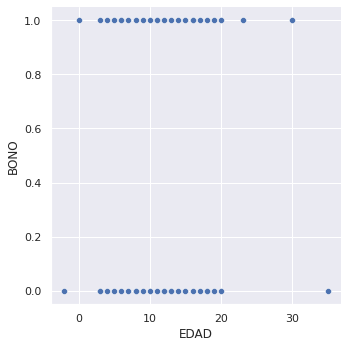

In [ ]:
sns.set(style="darkgrid")
sns.relplot(x="EDAD", y= "BONO", data=datos);

2. Realizar 10 gráficas acerca de la información evidenciada.


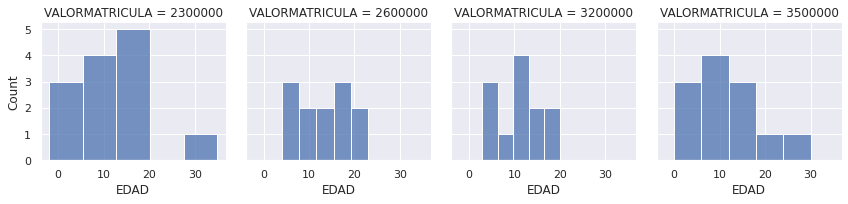

In [ ]:

multigraf(datos, 'VALORMATRICULA','EDAD')

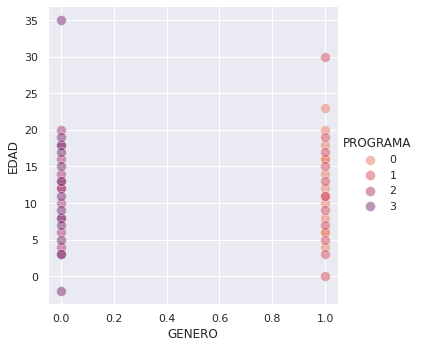

In [ ]:
disper(datos, 'PROGRAMA', 'GENERO','EDAD')

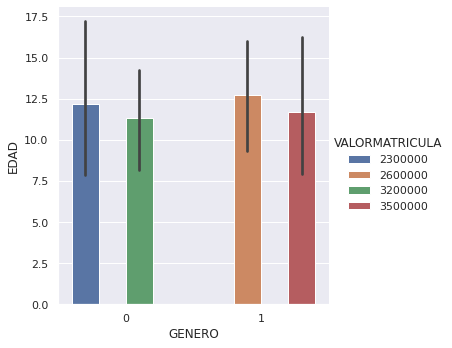

In [ ]:
barrasM(datos, 'GENERO','EDAD', 'VALORMATRICULA')

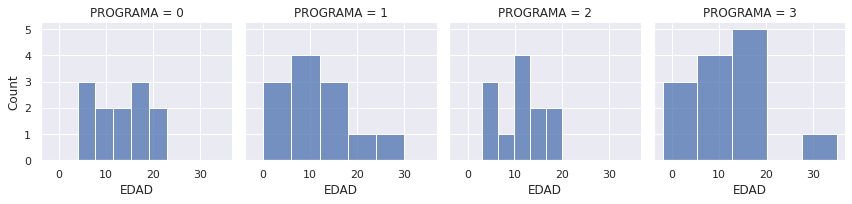

In [ ]:
multigraf(datos, 'PROGRAMA','EDAD')

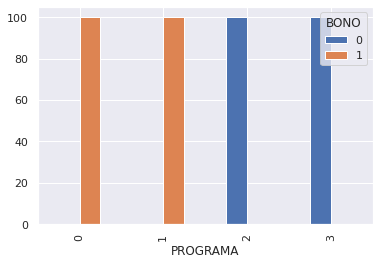

In [ ]:
#Como podemos ver en este grafico las carreras ing de sistemas y renovables no presentan un bono
#ya que no presentan algun familiar egresado,esto puede ser un indicio que estas dos carreras no son muy gustadas
#entre los familiares de los estudiantes.

plot = pd.crosstab(index=datos['PROGRAMA'],
                   columns=datos['BONO']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

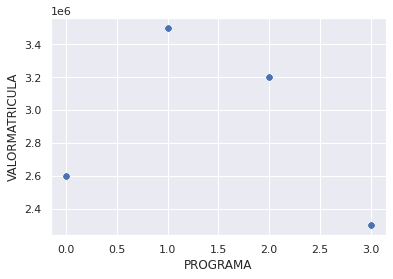

In [ ]:
#como podemos ver en este grafico la carrera mas costosa es Ingenieria Mecatronica, lo que en teria nos dice
#que debe de haber mas familiares para generar el bono.
my_plot = datos.plot("PROGRAMA", "VALORMATRICULA", kind="scatter")
plt.show()

In [ ]:
def diagCaja(df, coluno, coldos):
    fig, ax = plt.subplots(2, figsize=(5,5))
    plt1 = sns.boxplot(df[coluno], ax=ax[0])
    plt2 = sns.boxplot(df[coldos], ax=ax[1])
    plt.tight_layout()

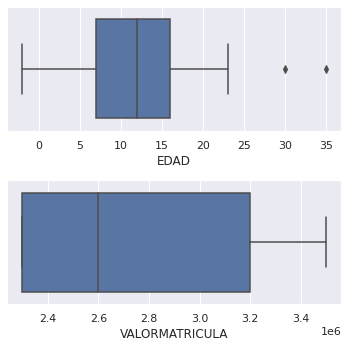

In [ ]:
diagCaja(datos, 'EDAD','VALORMATRICULA')

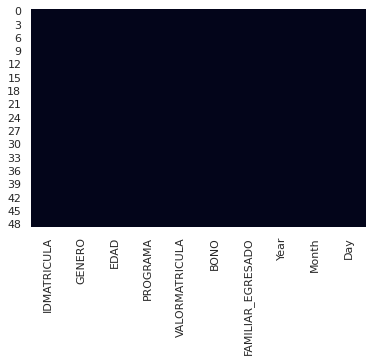

In [ ]:
 #Identificcamos la cantidad de valores perdidos en cada columna de forma grafica, como vemos no hay valores perdidos
datos.isnull().sum()
sns.heatmap(datos.isnull(), cbar=False)

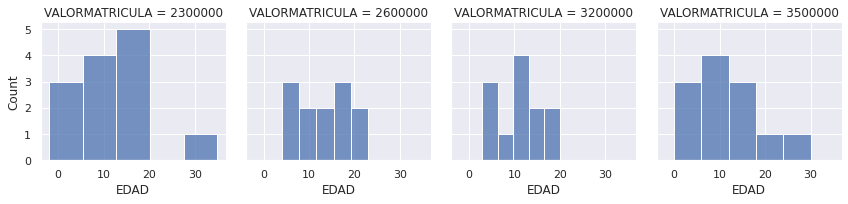

In [ ]:
multigraf(datos, 'VALORMATRICULA','EDAD')

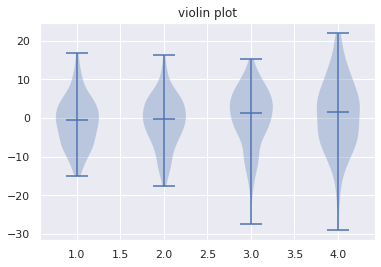

In [ ]:
# grafico de violin, se puede activar la visualizacion de la media y de la mediana
datos = [np.random.normal(0, std, 100) for std in range(6, 10)]
plt.violinplot(datos, showmeans=False, showmedians=True)
plt.title('violin plot');

In [ ]:
##Normalización
# Función para normalizar la data min - max sklearn

def normaData(df):
    valores = df.values  
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(valores)

    pd.DataFrame(np.vstack((scaler.data_min_, scaler.data_max_)),
             index=['Min', 'Max'],
             columns=df.columns)

    normalizados = scaler.transform(valores)
    df_norm = pd.DataFrame(normalizados,
                       index=df.index,
                       columns=df.columns)
    return df_norm

4. Realizar el proceso de normalización o estandarización segun lo requerido.





In [ ]:
#correlaciones
data1[num].corr()


,IDMATRICULA,EDAD,VALORMATRICULA
IDMATRICULA,1.000000,-0.574368,0.032668
EDAD,-0.574368,1.000000,-0.052397
VALORMATRICULA,0.032668,-0.052397,1.000000


In [ ]:
##Normalización
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm

In [ ]:
dataNorm = normaData(data1)

dataNorm.describe().T

,count,mean,std,min,25%,50%,75%,max
IDMATRICULA,49.0,0.500000,0.297681,0.0,0.250000,0.500000,0.750000,1.0
GENERO,49.0,0.489796,0.505076,0.0,0.000000,0.000000,1.000000,1.0
EDAD,49.0,0.377827,0.194229,0.0,0.243243,0.378378,0.486486,1.0
VALORMATRICULA,49.0,0.489796,0.401686,0.0,0.000000,0.250000,0.750000,1.0
BONO,49.0,0.489796,0.505076,0.0,0.000000,0.000000,1.000000,1.0
FAMILIAR_EGRESADO,49.0,0.265306,0.446071,0.0,0.000000,0.000000,1.000000,1.0
Year,49.0,0.639717,0.263175,0.0,0.538462,0.653846,0.846154,1.0
Month,49.0,0.536443,0.329309,0.0,0.285714,0.428571,0.857143,1.0
Day,49.0,0.453515,0.353071,0.0,0.055556,0.444444,0.777778,1.0
0,49.0,0.244898,0.434483,0.0,0.000000,0.000000,0.000000,1.0


In [ ]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
IDMATRICULA,49.0,1.256992e+07,28.577380,12569874.0,12569898.0,12569922.0,12569946.0,12569970.0
GENERO,49.0,4.897959e-01,0.505076,0.0,0.0,0.0,1.0,1.0
EDAD,49.0,1.197959e+01,7.186474,-2.0,7.0,12.0,16.0,35.0
VALORMATRICULA,49.0,2.887755e+06,482023.794823,2300000.0,2300000.0,2600000.0,3200000.0,3500000.0
BONO,49.0,4.897959e-01,0.505076,0.0,0.0,0.0,1.0,1.0
FAMILIAR_EGRESADO,49.0,2.653061e-01,0.446071,0.0,0.0,0.0,1.0,1.0
Year,49.0,2.001633e+03,6.842556,1985.0,1999.0,2002.0,2007.0,2011.0
Month,49.0,5.755102e+00,2.305163,2.0,4.0,5.0,8.0,9.0
Day,49.0,2.016327e+01,6.355270,12.0,13.0,20.0,26.0,30.0
0,49.0,2.448980e-01,0.434483,0.0,0.0,0.0,0.0,1.0


3. Realizar el test de normalidad de D'agostino y de Shapiro - wilk y comparar cuales son las mejores variables candidatas para predecir.

In [ ]:
#Test shapiro - wilk:
#Si el valor p ≤ 0.05, entonces rechazamos la hipótesis nula, es decir, asumimos que la distribución de nuestra variable no es normal.
#Si el valor p > 0.05, entonces no rechazamos la hipótesis nula, es decir, asumimos que la distribución de nuestra variable es normal.
testShapiroWilk(dataNorm)


,Variable,Valores P,Concepto
0,IDMATRICULA,6.263722e-02,Es una variable Normal
1,GENERO,9.170691e-10,No es una variable Normal
2,EDAD,1.113794e-01,Es una variable Normal
3,VALORMATRICULA,3.144518e-06,No es una variable Normal
4,BONO,9.170691e-10,No es una variable Normal
5,FAMILIAR_EGRESADO,5.195523e-11,No es una variable Normal
6,Year,1.286636e-05,No es una variable Normal
7,Month,1.279130e-04,No es una variable Normal
8,Day,3.480999e-04,No es una variable Normal
9,0,3.083562e-11,No es una variable Normal


In [ ]:
##test de D'agostino
#Kurtosis es una medida de si los datos son de cola gruesa o de cola ligera en relación con una distribución normal.

from scipy.stats import normaltest
import numpy as np
data = np.random.normal(loc = 20, scale = 5, size=150)
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Es un valor normal')
else:
 print('No es un valor normal')

stat=1.812, p=0.404
Es un valor normal


5. Dependiendo de la columna escogida para predecir proceder a la nivelación usando oversampling o undersampling.

In [ ]:
## Oversampling and under sampling (Librerias)
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter
from sklearn.datasets import make_classification
#Oversampling - Sobremuestreo: duplicación de muestras de la clase minoritaria
#Undersampling - Submuestreo: Eliminación de muestras de la clase mayoritaria.
#Tanto el sobremuestreo como el submuestreo implican la introducción de un sesgo para seleccionar más muestras de una clase que de otra.


In [ ]:
#nivelar el dataset con la variable que va a ser mi predictora o clasificadora
data1['BONO'].value_counts()

0    25
1    24
Name: BONO, dtype: int64

In [ ]:
#paso uno separar las clases - mayoritaria y minoritaria
dataFMayor = data1[data1.BONO==0]
dataFMenor = data1[data1.BONO==1]

In [ ]:
from sklearn.utils import resample

In [ ]:
#Over Sampling sobre la clase minoritaria

df_minoritaria = resample(dataFMenor, replace=True,
n_samples=60,
random_state=123)

In [ ]:
#Combina la clase mayoritaria con la minoritaria nivelada
df_Over = pd.concat([dataFMayor, df_minoritaria])

#Muestra el resultado final
df_Over.BONO.value_counts()

1    60
0    25
Name: BONO, dtype: int64

6. Realizar las correlaciones de pearson y spearman según lo requerido.

In [ ]:
corr_matrix = dataNorm.corr(method='spearman')
tidy_corr_matrix(corr_matrix)

##Según la correlación de   y  tienen un coeficiente de correlación de -0.038

,variable_1,variable_2,r,abs_r
3,IDMATRICULA,Year,0.876315,0.876315
30,Year,IDMATRICULA,0.876315,0.876315
29,VALORMATRICULA,3,-0.789872,0.789872
92,3,VALORMATRICULA,-0.789872,0.789872
27,VALORMATRICULA,1,0.769353,0.769353
...,...,...,...,...
36,Year,0,-0.001690,0.001690
80,2,IDMATRICULA,0.000000,0.000000
9,IDMATRICULA,3,0.000000,0.000000
8,IDMATRICULA,2,0.000000,0.000000


In [ ]:
corr_matrix = dataNorm.corr(method='pearson')
tidy_corr_matrix(corr_matrix)

,variable_1,variable_2,r,abs_r
3,IDMATRICULA,Year,7.916018e-01,7.916018e-01
30,Year,IDMATRICULA,7.916018e-01,7.916018e-01
29,VALORMATRICULA,3,-7.403307e-01,7.403307e-01
92,3,VALORMATRICULA,-7.403307e-01,7.403307e-01
27,VALORMATRICULA,1,7.308426e-01,7.308426e-01
...,...,...,...,...
49,Month,3,3.721340e-03,3.721340e-03
90,3,IDMATRICULA,5.589458e-13,5.589458e-13
9,IDMATRICULA,3,5.589458e-13,5.589458e-13
80,2,IDMATRICULA,-1.913010e-13,1.913010e-13


7. Seleccionar las variables independientes y dependiente y realizar algoritmo de regresión lineal simple y múltiple. Hacerlo para porcentaje de entrenamiento 60, 70 y 80 verificando la mejor eficiencia y RMSE.

In [ ]:
##Dividir el dataset
##X variable o variables independiente
X = dataNorm['EDAD']
##y variable a predecir
y = dataNorm['VALORMATRICULA']

##Partición de la data 60% entrenamiento 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.60, random_state=100)

#X_train.shape, X_test.shape

##Entrenar el modelo
X_train_sm = sm.add_constant(X_train)

RLMUno = sm.OLS(y_train, X_train_sm).fit()

In [ ]:
RLMUno.params

#y = m+ b*X

const    0.427136
EDAD     0.278894
dtype: float64

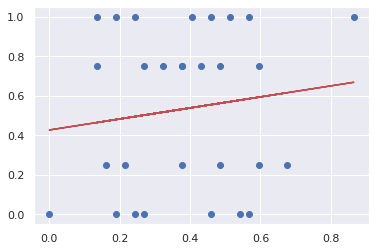

In [ ]:
#con el 60%
plt.scatter(X_train, y_train)
plt.plot(X_train, 0.427136 + 0.278894 * X_train, 'r')
plt.show()

In [ ]:
print(RLMUno.summary())
#de 48 datos analizados el 0.018  % se pueden predecir de forma correcta, caso contrario no se podran predecir de la mejor forma


                            OLS Regression Results                            
Dep. Variable:         VALORMATRICULA   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                    0.4856
Date:                Mon, 07 Nov 2022   Prob (F-statistic):              0.492
Time:                        23:51:10   Log-Likelihood:                -14.163
No. Observations:                  29   AIC:                             32.33
Df Residuals:                      27   BIC:                             35.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4271      0.172      2.487      0.0

In [ ]:
##Dividir el dataset
##X variable o variables independiente
X = dataNorm['EDAD']
##y variable a predecir
y = dataNorm['VALORMATRICULA']
##Partición de la data 70% entrenamiento 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=100)
#X_train.shape, X_test.shape

##Entrenar el modelo
X_train_sm = sm.add_constant(X_train)

RLMUno = sm.OLS(y_train, X_train_sm).fit()

In [ ]:
RLMUno.params

const    0.449607
EDAD     0.190280
dtype: float64

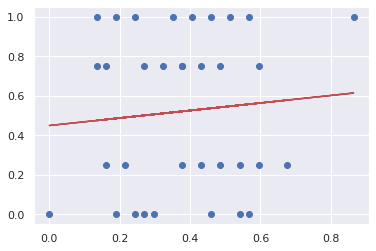

In [ ]:
#con el 70%
plt.scatter(X_train, y_train)
plt.plot(X_train, 0.449607 + 0.190280 * X_train, 'r')
plt.show()

In [ ]:
##Dividir el dataset
##X variable o variables independiente
X = dataNorm['EDAD']
##y variable a predecir
y = dataNorm['VALORMATRICULA']
##Partición de la data 80% entrenamiento 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=100)
#X_train.shape, X_test.shape

##Entrenar el modelo
X_train_sm = sm.add_constant(X_train)

RLMUno = sm.OLS(y_train, X_train_sm).fit()

In [ ]:
RLMUno.params

const    0.588287
EDAD    -0.145167
dtype: float64

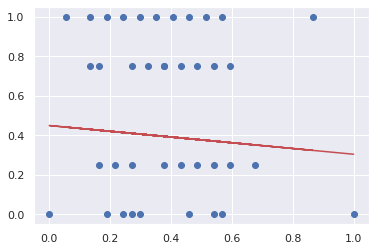

In [ ]:
#con el 80%
plt.scatter(X_train, y_train)
plt.plot(X_train, 0.449607 + ( -0.145167) * X_train, 'r')
plt.show()

In [ ]:
y_train_pred = RLMUno.predict(X_train_sm)

prediccion = (y_train - y_train_pred)

prediccion.describe().T

count    3.900000e+01
mean    -2.248913e-16
std      4.010661e-01
min     -5.882872e-01
25%     -3.108232e-01
50%      1.852534e-01
75%      4.254448e-01
max      5.372628e-01
dtype: float64

In [ ]:
X_test_sm = sm.add_constant(X_test)

y_pred = RLMUno.predict(X_test_sm)

y_pred.describe().T

count    10.000000
mean      0.538852
std       0.017663
min       0.513742
25%       0.529436
50%       0.537283
75%       0.552976
max       0.568670
dtype: float64

In [ ]:
y_test

6     0.75
20    0.00
33    0.25
28    0.00
42    0.75
48    0.00
5     0.25
32    0.00
41    0.25
31    1.00
Name: VALORMATRICULA, dtype: float64

In [ ]:
y_pred

6     0.529436
20    0.513742
33    0.541206
28    0.529436
42    0.556900
48    0.568670
5     0.517665
32    0.537283
41    0.556900
31    0.537283
dtype: float64

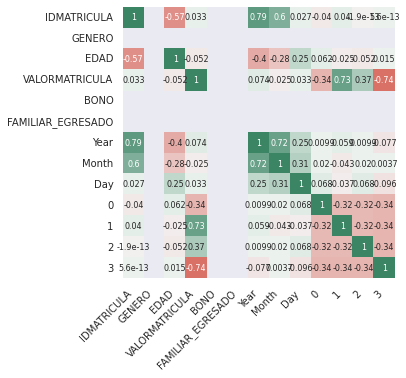

In [ ]:
#grafica de calor
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(15, 150, n=100),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

In [ ]:
data1 #datos completos

,IDMATRICULA,GENERO,EDAD,VALORMATRICULA,BONO,FAMILIAR_EGRESADO,Year,Month,Day,0,1,2,3
0,12569874,1,35,2300000,1,1,1985,2,12,0,0,0,1
1,12569876,1,23,2600000,1,1,1998,4,23,1,0,0,0
2,12569878,1,12,3200000,1,1,1999,5,13,0,0,1,0
3,12569880,1,30,3500000,1,1,1985,2,12,0,1,0,0
4,12569882,1,18,2300000,1,1,1998,4,23,0,0,0,1
5,12569884,1,16,2600000,1,1,1999,5,13,1,0,0,0
6,12569886,1,13,3200000,1,1,1985,2,12,0,0,1,0
7,12569888,1,11,3500000,1,1,1998,4,23,0,1,0,0
8,12569890,1,8,2300000,1,1,1999,5,13,0,0,0,1
9,12569892,1,6,2600000,1,1,1985,2,12,1,0,0,0


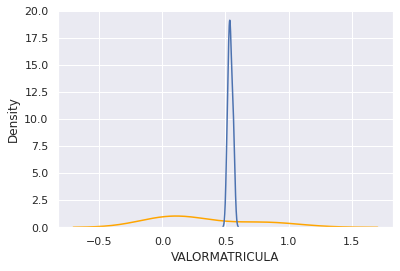

In [ ]:
#grafica que nos permite saber la cantidad de valores predecidos vs valores actuales, esta grafica nos muestra que la mitad de valores esta siendo predecida de forma natural
ax1 = sns.distplot(y_test, hist=False, color='orange', label='Valores actuales')
sns.distplot(y_pred, hist=False, color='b', label='Valores predecidos')

In [ ]:
#funcion para medir la tasa de error y redondearla por 3
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, y_pred)

round(rmse, 3)

0.171